In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
run  = pd.read_csv("./clean_dataset/clean_male_ankle_run.csv", parse_dates=['time'])
walk = pd.read_csv("./clean_dataset/clean_male_ankle_walk.csv", parse_dates=['time'])

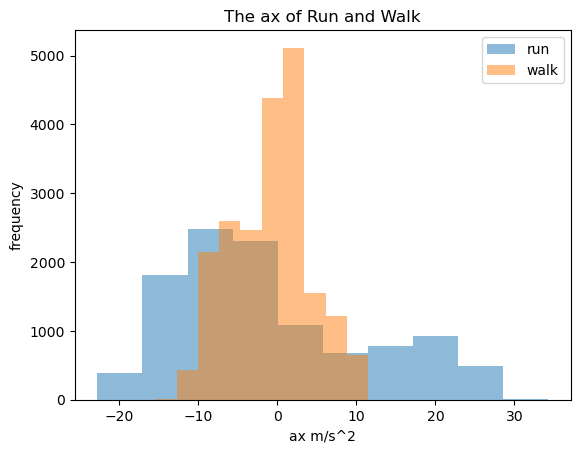

In [3]:
plt.hist(run['ax'],alpha=0.5, label='run')
plt.hist(walk['ax'],alpha=0.5, label='walk')
plt.title('The ax of Run and Walk')
plt.xlabel('ax m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

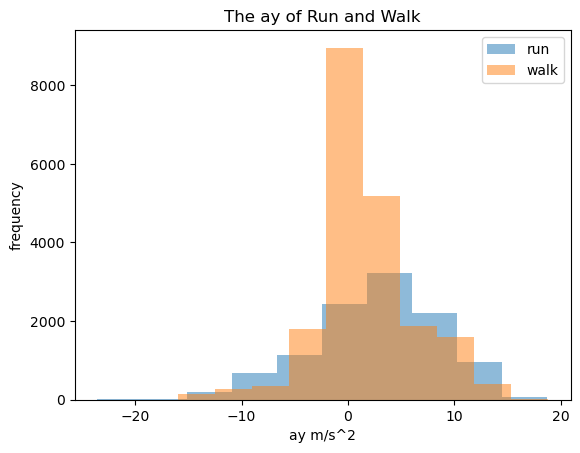

In [4]:
plt.hist(run['ay'],alpha=0.5, label='run')
plt.hist(walk['ay'],alpha=0.5, label='walk')
plt.title('The ay of Run and Walk')
plt.xlabel('ay m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

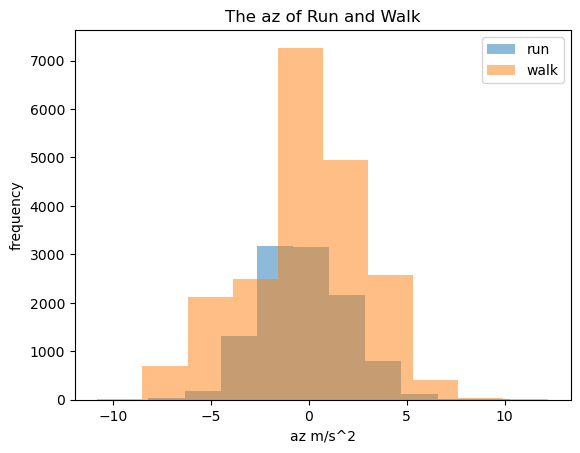

In [5]:
plt.hist(run['az'],alpha=0.5, label='run')
plt.hist(walk['az'],alpha=0.5, label='walk')
plt.title('The az of Run and Walk')
plt.xlabel('az m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

In [6]:
run['acceleration'] = np.sqrt((run['ax'])**2 + (run['ay'])**2 + (run['az'])**2)
walk['acceleration'] = np.sqrt((walk['ax'])**2 + (walk['ay'])**2 + (walk['az'])**2)

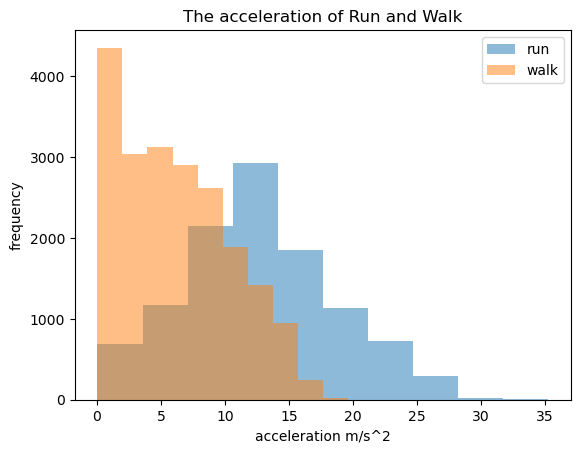

In [7]:
plt.hist(run['acceleration'],alpha=0.5, label='run')
plt.hist(walk['acceleration'],alpha=0.5, label='walk')
plt.title('The acceleration of Run and Walk')
plt.xlabel('acceleration m/s^2')
plt.ylabel('frequency')
plt.legend(loc="upper right")
#plt.show()

In [8]:
run['ax'].describe()

count    10973.000000
mean        -0.827035
std         12.072785
min        -22.754783
25%        -10.369794
50%         -3.451792
75%          6.995622
max         34.265893
Name: ax, dtype: float64

In [9]:
run['ay'].describe()

count    10973.000000
mean         2.651270
std          6.102563
min        -23.556724
25%         -0.977015
50%          3.356489
75%          6.871749
max         18.679079
Name: ay, dtype: float64

In [10]:
run['az'].describe()

count    10973.000000
mean        -0.258354
std          2.267574
min         -8.191712
25%         -1.832736
50%         -0.400096
75%          1.293807
max         10.261983
Name: az, dtype: float64

In [11]:
run['acceleration'].describe()

count    10973.000000
mean        12.693946
std          5.896188
min          0.038085
25%          8.740019
50%         12.335753
75%         16.508654
max         35.276521
Name: acceleration, dtype: float64

In [12]:
walk['ax'].describe()

count    20577.000000
mean        -0.793876
std          4.982553
min        -15.413234
25%         -4.701402
50%         -0.081815
75%          2.211368
max         11.486800
Name: ax, dtype: float64

In [13]:
walk['ay'].describe()

count    20577.000000
mean         1.721215
std          4.448853
min        -16.006198
25%         -0.120503
50%          0.777156
75%          3.840642
max         18.823341
Name: ay, dtype: float64

In [14]:
walk['az'].describe()

count    20577.000000
mean        -0.110064
std          3.011780
min        -10.797813
25%         -1.749989
50%          0.170023
75%          1.727710
max         12.217852
Name: az, dtype: float64

In [15]:
walk['acceleration'].describe()

count    20577.000000
mean         6.257397
std          4.258771
min          0.026605
25%          2.412479
50%          5.760448
75%          9.338643
max         19.623436
Name: acceleration, dtype: float64

In [19]:
run = run[run['time'].str.len() == 24]
run = run.reset_index(drop=True)

In [20]:
new_time = pd.Series(np.zeros(run.shape[0]), index=run.index)
for i in range(run.shape[0]):
    temp = pd.to_datetime(run['time'][i], format='%Y-%m-%d %H:%M:%S.%f')
    new_time[i] = temp
run['time'] = new_time

In [21]:
time_interval = run['time'][1] - run['time'][0]
time_interval = time_interval.total_seconds()

total_time = run['time'][run.shape[0]-1] - run['time'][0]
total_time = total_time.total_seconds()

In [23]:
run['ax_time'] = run['ax'] * time_interval
run['ay_time'] = run['ay'] * time_interval
run['az_time'] = run['az'] * time_interval

s_run = np.sqrt((run['ax_time'].sum())**2 + (run['ay_time'].sum())**2 + (run['az_time'].sum())**2)
s_run

336.69568398998484

In [25]:
walk['ax_time'] = walk['ax'] * time_interval
walk['ay_time'] = walk['ay'] * time_interval
walk['az_time'] = walk['az'] * time_interval

s_walk = np.sqrt((walk['ax_time'].sum())**2 + (walk['ay_time'].sum())**2 + (walk['az_time'].sum())**2)
s_walk

429.75739348528407